# ETL Y EDA SALES FINAL 2016

In [19]:
#Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
#Cargamos el archivo csv y nombramos dataset
SalesFinal = pd.read_csv("SalesFINAL12312016.csv")

In [3]:
#Informacion el dataset
SalesFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 112.0+ MB


In [4]:
#Primeras filas
SalesFinal.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [5]:
#Verificamos valores nulos en cada columna
print("\nValores nulos por columna:")
print(SalesFinal.isnull().sum())


Valores nulos por columna:
InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64


In [6]:
#Averiguamos si existen filas duplicadas
filas_duplicadas = SalesFinal.duplicated()

#Hacemos el recuento de las filas duplicadas
contar_filas_duplicadas = filas_duplicadas.sum()

#Mostramos el número de filas duplicadas
print(f'Número de filas duplicadas en la tabla de factura_compras: {contar_filas_duplicadas}')

#Mostramos las filas filas duplicadas 
if contar_filas_duplicadas > 0:
    print("Filas duplicadas en la tabla Producto:")
    print(SalesFinal[filas_duplicadas])

Número de filas duplicadas en la tabla de factura_compras: 0


In [7]:
#Verificamos solo las columnas numericas con valores negativos 
negativos = SalesFinal.select_dtypes(include=['number']) < 0

# Obtenemos los nombres de las columnas que tienen valores negativos
columnas_negativas = negativos.any()

# Filtramos las columnas que tienen al menos un valor negativo
columnas_con_negativos = columnas_negativas[columnas_negativas].index.tolist()

# Imprimimos los resultados
if columnas_con_negativos:
    print(f"Columnas con valores negativos: {columnas_con_negativos}")
    for column in columnas_con_negativos:
        print(f"\nValores negativos en la columna '{column}':")
        print(SalesFinal[SalesFinal[column] < 0]) # muestra las filas negativas
else:
    print("No hay valores negativos en el Dataframe.")

No hay valores negativos en el Dataframe.


In [11]:
# Convertimos la columna 'endDate' a tipo de dato datetime, usando el paramero errors="coerce"
SalesFinal['SalesDate'] = pd.to_datetime(SalesFinal['SalesDate'], errors='coerce')
print (SalesFinal['SalesDate'].dtypes)

datetime64[ns]


In [8]:
#Se borra la columna VendorName para alivianar la base
del SalesFinal['VendorName']

In [9]:
#Estadisticas de cada columna
for i in SalesFinal.columns:
    print(i)
    #Esto imprime las estadísticas descriptivas (como count, mean, std, min, 25%, 50%, 75%, max) para esa columna.
    print(SalesFinal[i].describe())
    print('--------------------------------------------------------------')

InventoryId
count                1048575
unique                170131
top       13_TARMSWORTH_8064
freq                      57
Name: InventoryId, dtype: object
--------------------------------------------------------------
Store
count    1.048575e+06
mean     4.008063e+01
std      2.435739e+01
min      1.000000e+00
25%      1.500000e+01
50%      3.900000e+01
75%      6.400000e+01
max      7.900000e+01
Name: Store, dtype: float64
--------------------------------------------------------------
Brand
count    1.048575e+06
mean     1.216959e+04
std      1.241921e+04
min      5.800000e+01
25%      3.680000e+03
50%      6.296000e+03
75%      1.795400e+04
max      9.008900e+04
Name: Brand, dtype: float64
--------------------------------------------------------------
Description
count               1048575
unique                 6890
top       Smirnoff 80 Proof
freq                   7123
Name: Description, dtype: object
--------------------------------------------------------------
Size
count

In [12]:
#Como en los demas archivos se encuestra la misma convercion de la columna Size, creando SizeMl
import re

def convertir_a_ml(size):
    # Expresión regular para extraer el número principal, unidad y posibles cantidades de paquetes
    match = re.match(r"(\d+(\.\d+)?)\s*(mL|L|liter|oz)?(?:\s*(\d+)?\s*Pk)?", str(size), re.IGNORECASE)
    
    if match:
        valor = float(match.group(1))  # Valor numérico principal
        unidad = match.group(3).lower() if match.group(3) else ''  # Unidad de medida
        cantidad_pk = int(match.group(4)) if match.group(4) else 1  # Cantidad en el paquete, por defecto 1
        
        # Convertir a mililitros según la unidad
        if unidad in ['l', 'liter']:
            return valor * 1000 * cantidad_pk  # Convertir litros a mililitros y multiplicar por cantidad
        elif unidad == 'oz':
            return valor * 29.5735 * cantidad_pk  # Convertir onzas a mililitros y multiplicar por cantidad
        elif unidad == 'ml':
            return valor * cantidad_pk  # Ya está en mililitros, multiplicar por cantidad
    return None

# Aplicar la función a la columna 'Size' para crear la columna 'Size_ml' en mL
SalesFinal['SizeMl'] = SalesFinal['Size'].apply(convertir_a_ml)

# Verificar el resultado
print(SalesFinal[['Size', 'SizeMl']].head(10))

         Size  SizeMl
0       750mL   750.0
1       750mL   750.0
2       750mL   750.0
3       750mL   750.0
4  375mL 2 Pk   750.0
5  375mL 2 Pk   750.0
6  375mL 2 Pk   750.0
7  375mL 2 Pk   750.0
8       750mL   750.0
9       750mL   750.0


In [13]:
# Eliminar filas donde 'SizeMl' tiene valores NaN
SalesFinal = SalesFinal.dropna(subset=['SizeMl'])

# Verificar el resultado
print(SalesFinal['SizeMl'].unique())

[  750.       200.      2250.      1125.       600.      1500.
  5000.       150.       400.      1750.      3000.       375.
    50.       100.       250.       187.       500.       748.
  1000.       800.      4000.       147.8675   561.       300.
   720.       330.       650.617    180.     18000.     20000.    ]


In [14]:
#Borramos la columna Size

del SalesFinal['Size']

In [15]:
SalesFinal['Volume'].unique()

array([  750,   375,    50,   200,  1500,  5000,   100,  1750,  3000,
         187,   500,   250,  4000,   150,   300,   720,   330,   650,
         180, 18000, 20000])

In [16]:
#Contamos los valores NaN en la columna 'Volume'
nan_volume_count = SalesFinal['Volume'].isnull().sum()
print(f"Cantidad de valores NaN en 'Volume': {nan_volume_count}")

Cantidad de valores NaN en 'Volume': 0


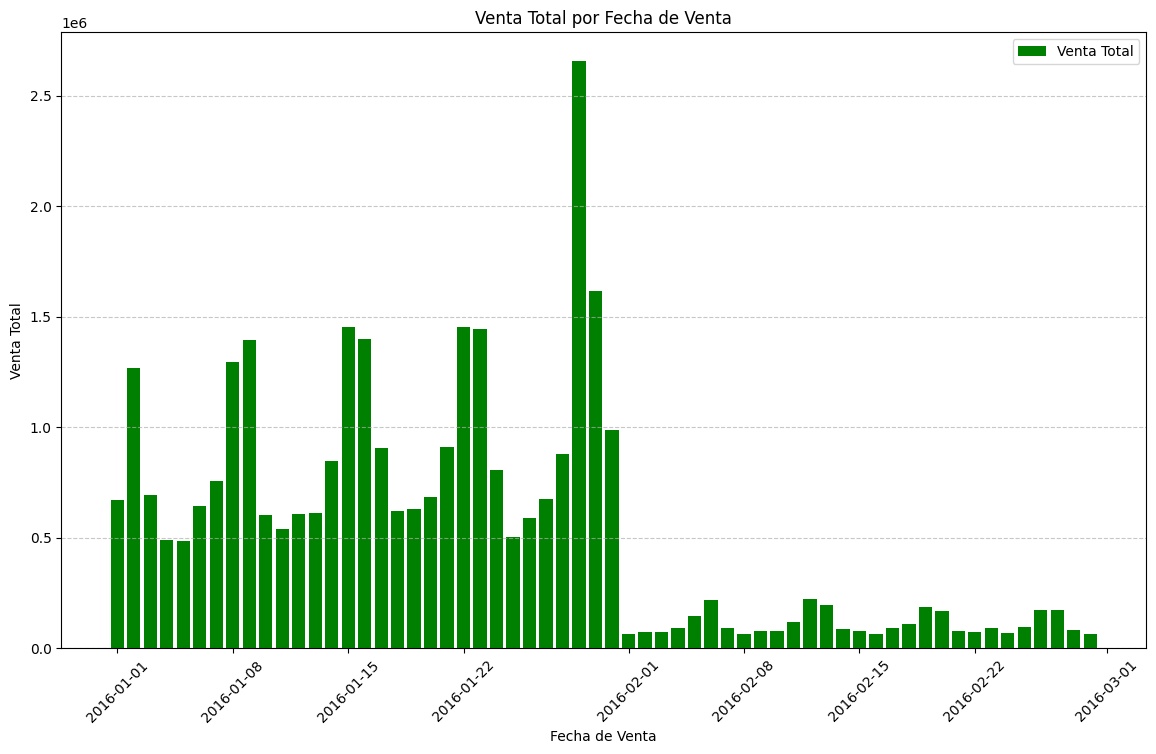

In [18]:
#Realizamos grafico de venta total por fecha
import matplotlib.pyplot as plt

#Agrupamos los datos por fecha y sumar los valores de "Venta_Total"
ventas_agrupadas = SalesFinal.groupby('SalesDate').agg({'SalesDollars': 'sum'}).reset_index()

#Creamos el gráfico de barras
plt.figure(figsize=(14, 8))

#Hacemos Gráfico de barras para la venta total, cambiando el color
plt.bar(ventas_agrupadas['SalesDate'], ventas_agrupadas['SalesDollars'], color='green', label='Venta Total')
plt.title('Venta Total por Fecha de Venta')
plt.xlabel('Fecha de Venta')
plt.ylabel('Venta Total')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


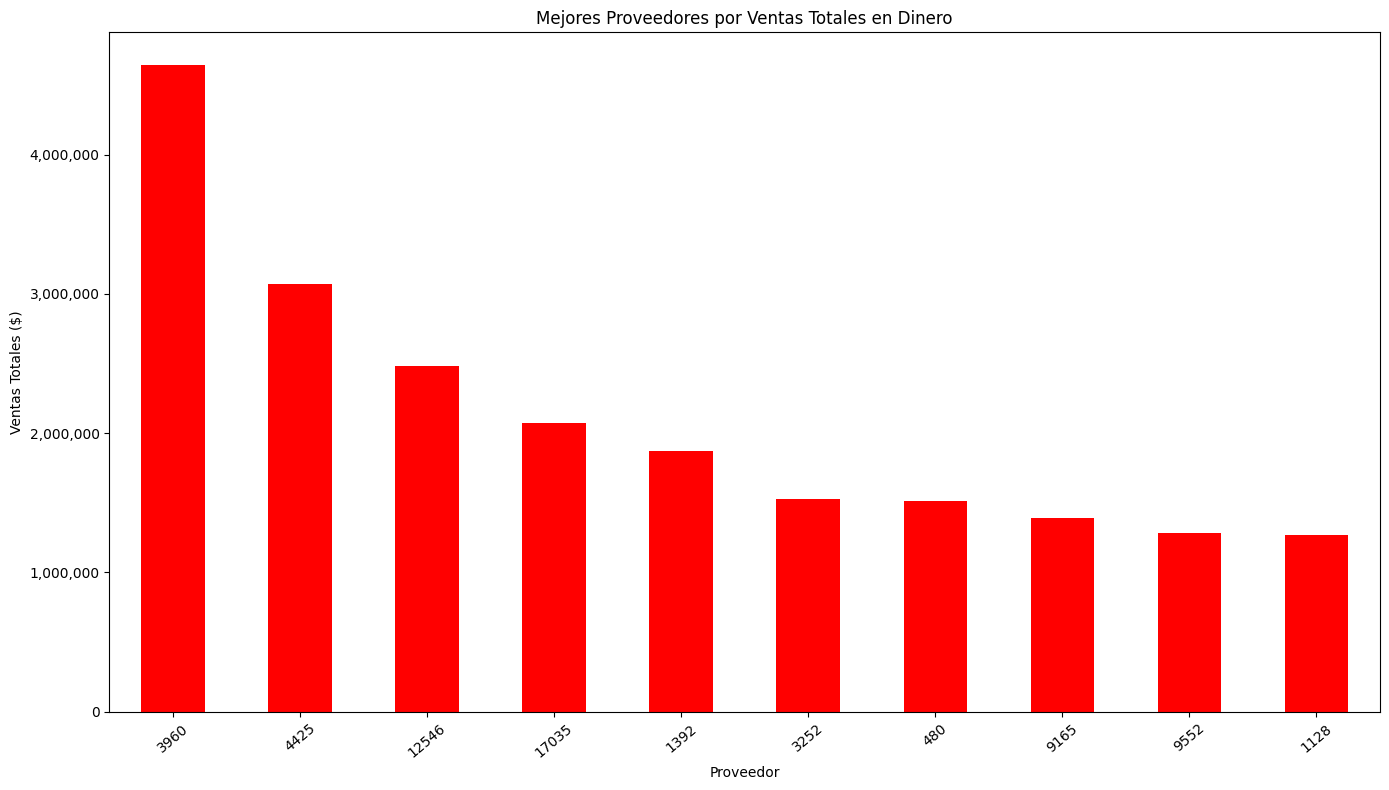

In [23]:
#Realizamos un grafivo para los proveedores por venta totales (salesdollars)

#Agrupamos por proveedor y sumar las ventas en dólares
proveedor_ventas = SalesFinal.groupby('VendorNo')['SalesDollars'].sum().sort_values(ascending=False)

# Seleccionar los 10 mejores proveedores
top_proveedores = proveedor_ventas.head(10)

plt.figure(figsize=(14, 8))
top_proveedores.plot(kind='bar', color='red')

# Configurar el formato del eje y para evitar la notación científica
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.title('Mejores Proveedores por Ventas Totales en Dinero')
plt.xlabel('Proveedor')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


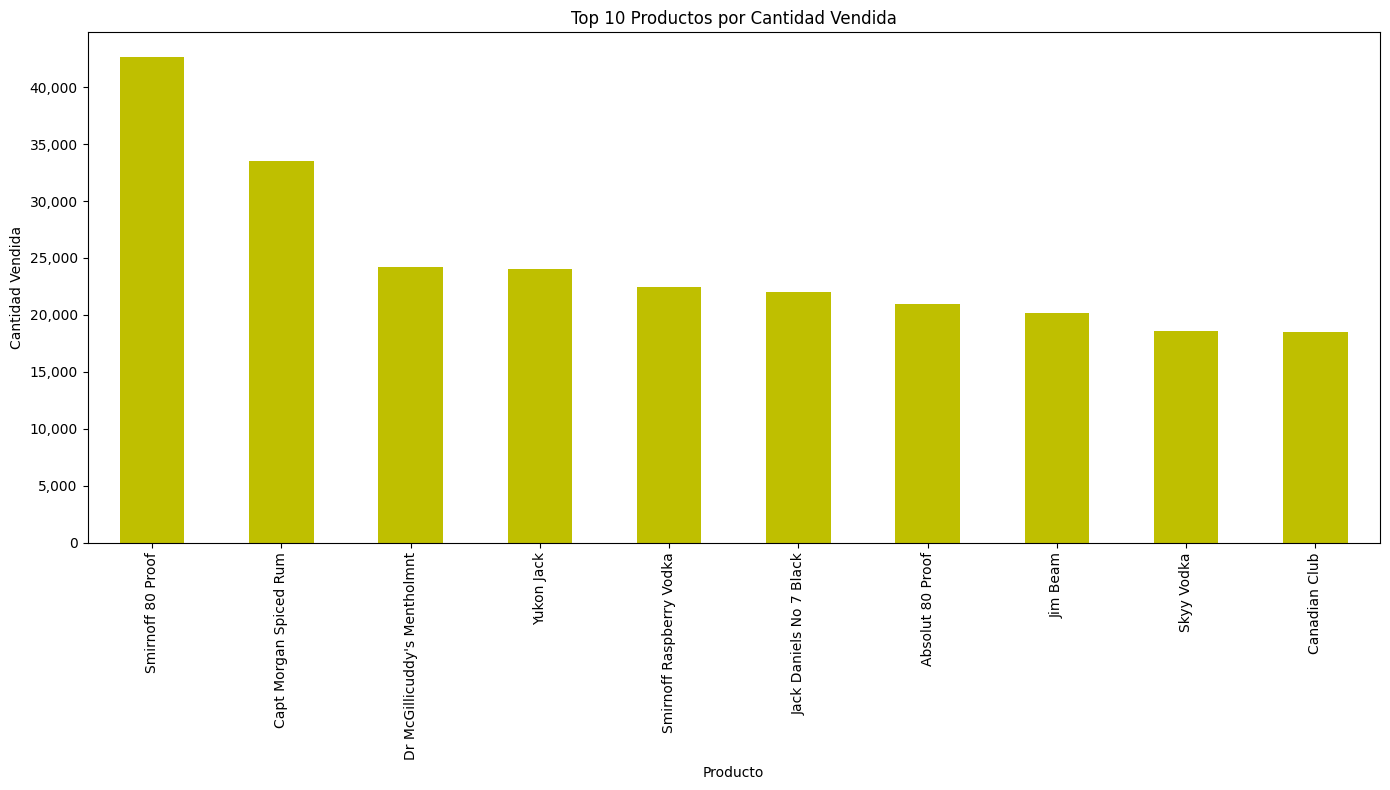

In [25]:
#Creamos un grafico de Productos por cantidad vendida

#Agrupamos por descripción del producto y sumar las cantidades vendidas
producto_cantidad = SalesFinal.groupby('Description')['SalesQuantity'].sum().sort_values(ascending=False)

#Seleccionamos los 10 mejores productos
top_10_productos = producto_cantidad.head(10)

#Creamos el gráfico de barras y mostramos
plt.figure(figsize=(14, 8))
top_10_productos.plot(kind='bar', color='y')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.title('Top 10 Productos por Cantidad Vendida')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [26]:
# Encontrar la fecha más antigua y la más reciente
fecha_min = SalesFinal['SalesDate'].min()
fecha_max = SalesFinal['SalesDate'].max()

print(f'Fecha más antigua en el dataset: {fecha_min}')
print(f'Fecha más reciente en el dataset: {fecha_max}')


Fecha más antigua en el dataset: 2016-01-01 00:00:00
Fecha más reciente en el dataset: 2016-02-29 00:00:00


In [27]:
SalesFinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029273 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   InventoryId     1029273 non-null  object        
 1   Store           1029273 non-null  int64         
 2   Brand           1029273 non-null  int64         
 3   Description     1029273 non-null  object        
 4   SalesQuantity   1029273 non-null  int64         
 5   SalesDollars    1029273 non-null  float64       
 6   SalesPrice      1029273 non-null  float64       
 7   SalesDate       1029273 non-null  datetime64[ns]
 8   Volume          1029273 non-null  int64         
 9   Classification  1029273 non-null  int64         
 10  ExciseTax       1029273 non-null  float64       
 11  VendorNo        1029273 non-null  int64         
 12  SizeMl          1029273 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 109.9+ MB

In [29]:
#Renombramos, Guardamos el dataframe en tipo csv y listo para normalizar.
SalesFinal = SalesFinal.rename(columns={
    'InventoryId': 'InventoryID',
    'Store': 'StoreID',
    'Brand': 'BrandID',
    'Drescription': 'Drescription',
    'SalesQuantity': 'SalesQuantity',
    'SalesDollars': 'GrossSales',
    'SalesPrice': 'SalesPrice',
    'SalesDate': 'SaleDate',
    'Volume': 'Volume',
    'Classification': 'Classification',
    'ExciseTax':'ExciseTax',
    'VendorNo': 'VendorID',
    'SizeMl': 'SizeMl'
    })
SalesFinal.info()
SalesFinal.to_csv (r"C:\Users\Admin\Desktop\proyecto final\Proceso\CSV listos\SalesFinal.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 1029273 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   InventoryID     1029273 non-null  object        
 1   StoreID         1029273 non-null  int64         
 2   BrandID         1029273 non-null  int64         
 3   Description     1029273 non-null  object        
 4   SalesQuantity   1029273 non-null  int64         
 5   GrossSales      1029273 non-null  float64       
 6   SalesPrice      1029273 non-null  float64       
 7   SaleDate        1029273 non-null  datetime64[ns]
 8   Volume          1029273 non-null  int64         
 9   Classification  1029273 non-null  int64         
 10  ExciseTax       1029273 non-null  float64       
 11  VendorID        1029273 non-null  int64         
 12  SizeMl          1029273 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 109.9+ MB